## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
featofvar = 'Type and Serum'

remote_folder = '10_04_18_COOH_PEG_serum' #Folder in AWS S3 containing files to be analyzed
bucket = 'rhodese.data'
vids = 10
types = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

counter2 = 0
counter = 0
for typ in types:
    for num in range(1, vids+1):
            try:
                filename = 'features_{}_XY{}.csv'.format(typ, '%02d' % num)
                print(filename)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                print('{} size: {}'.format(filename, fstats.shape))
                fstats['Type and Serum'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                if 'serum' in typ:
                    fstats['Serum'] = pd.Series(fstats.shape[0]*['serum'], index=fstats.index)
                else:
                    fstats['Serum'] = pd.Series(fstats.shape[0]*['no serum'], index=fstats.index)
                if 'COOH' in typ:
                    fstats['Type'] = pd.Series(fstats.shape[0]*['COOH'], index=fstats.index)
                else:
                    fstats['Type'] = pd.Series(fstats.shape[0]*['PEG'], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('Skipped!: {}'.format(filename))
    counter2 = counter2 + 1

features_COOH_XY01.csv
features_COOH_XY01.csv size: (14913, 67)
features_COOH_XY02.csv
features_COOH_XY02.csv size: (14225, 67)
features_COOH_XY03.csv
features_COOH_XY03.csv size: (14767, 67)
features_COOH_XY04.csv
features_COOH_XY04.csv size: (14936, 67)
features_COOH_XY05.csv
features_COOH_XY05.csv size: (15344, 67)
features_COOH_XY06.csv
features_COOH_XY06.csv size: (63173, 67)
features_COOH_XY07.csv
features_COOH_XY07.csv size: (42620, 67)
features_COOH_XY08.csv
features_COOH_XY08.csv size: (43427, 67)
features_COOH_XY09.csv
features_COOH_XY09.csv size: (19220, 67)
features_COOH_XY10.csv
features_COOH_XY10.csv size: (27610, 67)
features_COOH_serum_XY01.csv
features_COOH_serum_XY01.csv size: (42821, 67)
features_COOH_serum_XY02.csv
features_COOH_serum_XY02.csv size: (42778, 67)
features_COOH_serum_XY03.csv
features_COOH_serum_XY03.csv size: (42996, 67)
features_COOH_serum_XY04.csv
features_COOH_serum_XY04.csv size: (43391, 67)
features_COOH_serum_XY05.csv
features_COOH_serum_XY05.cs

In [9]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [34]:
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

In [35]:
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

In [30]:
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

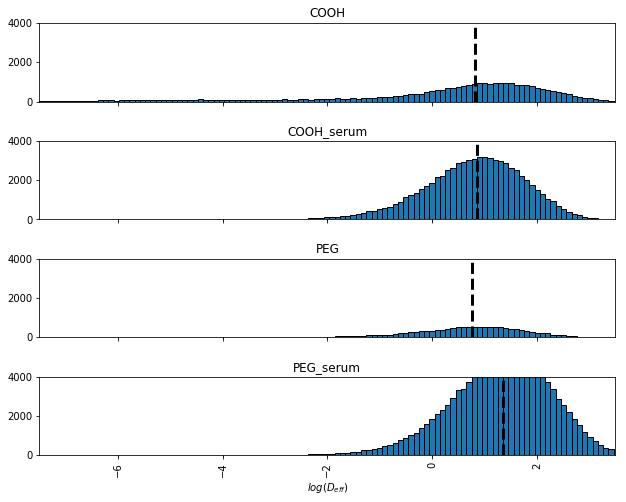

In [13]:
bins = np.linspace(-10, 10, 200)
axes = fstats_tot.hist(column='LogDeff2', by='Type and Serum', layout=(4, 1), bins=bins, sharex=True, sharey=True,
                        figsize=(10, 8), edgecolor='k')

means = []
counter = 0
#types2 = ['100', '200', '500']
for ax, typ in zip(axes, types):
    ax.set_ylim([0,4000])
    #ax.set_xscale("log", nonposx='clip')
    ax.set_xlim([-7.5,3.5])
    means.append(fstats_tot[fstats_tot['Type and Serum']==typ]['LogDeff2'].median())
    ax.axvline(fstats_tot[fstats_tot['Type and Serum']==typ]['LogDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    counter = counter + 1
    if counter == 4:
        ax.set_xlabel(r'$log(D_{eff})$')

In [36]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [37]:
X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].reset_index()
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].reset_index()

In [23]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[ 0.80594094  0.84493152  1.10888957]


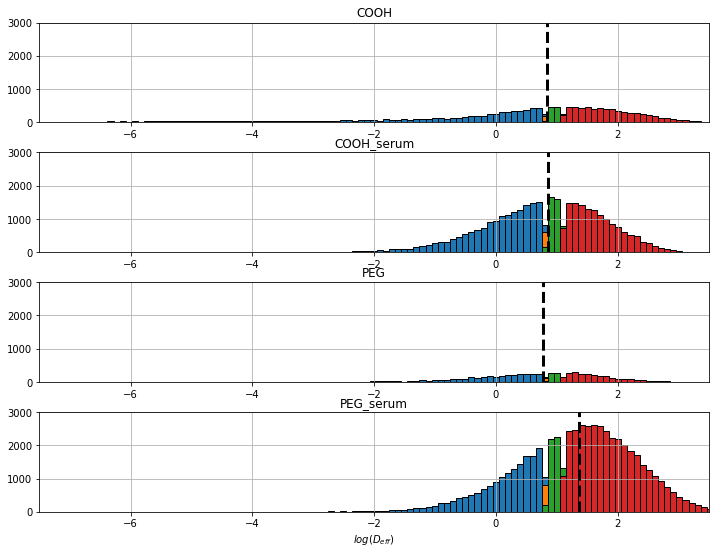

In [28]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.806, 0.845, 1.109, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_train[X_train['Type and Serum']==types[counter]]['LogDeff2'].median())
    for i in range(4):
        X_train[(X_train['Type and Serum']==types[counter]) & (Dbins[i] < X_train['LogDeff2']) & (X_train['LogDeff2'] < Dbins[i+1])].hist(column='LogDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 3000])
    ax.axvline(X_train[X_train['Type and Serum']==types[counter]]['LogDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

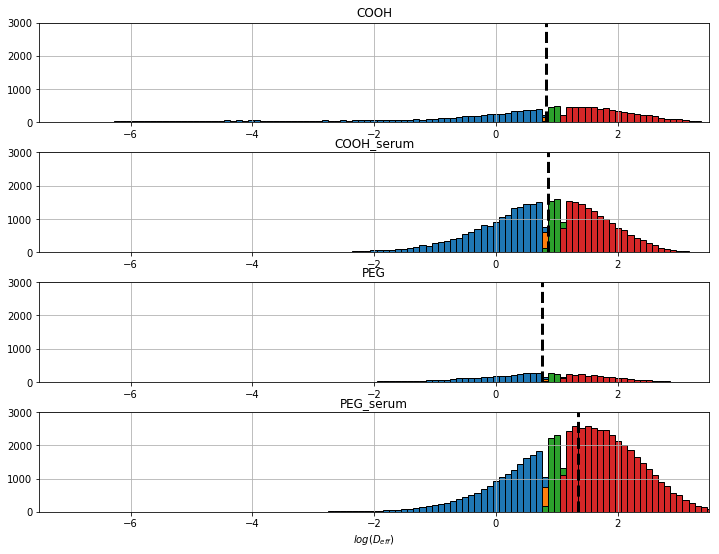

In [29]:
Dbins = [-10, 0.806, 0.845, 1.109, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_test[X_test['Type and Serum']==types[counter]]['LogDeff2'].median())
    for i in range(4):
        X_test[(X_test['Type and Serum']==types[counter]) & (Dbins[i] < X_test['LogDeff2']) & (X_test['LogDeff2'] < Dbins[i+1])].hist(column='LogDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 3000])
    ax.axvline(X_test[X_test['Type and Serum']==types[counter]]['LogDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [32]:
y_pred2 = list(pd.cut(X_train.LogDeff2.values, bins=[-10, 0.806, 0.845, 1.109, 10], labels=types).astype(str))
y_true2 = X_train['Type and Serum'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

       COOH     0.1624    0.0551    0.0823    134717
 COOH_serum     0.3579    0.0032    0.0063    191947
        PEG     0.0576    0.0133    0.0216     52038
  PEG_serum     0.6130    0.1031    0.1766    351935
        nan     0.0000    0.0000    0.0000         0

avg / total     0.4233    0.0616    0.1034    730637



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [33]:
y_pred2 = list(pd.cut(X_test.LogDeff2.values, bins=[-10, 0.806, 0.845, 1.109, 10], labels=types).astype(str))
y_true2 = X_test['Type and Serum'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

       COOH     0.1625    0.0550    0.0822    135518
 COOH_serum     0.3763    0.0032    0.0064    191654
        PEG     0.0562    0.0131    0.0212     51917
  PEG_serum     0.6120    0.1033    0.1767    352061
        nan     0.0000    0.0000    0.0000         0

avg / total     0.4274    0.0617    0.1035    731150



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [43]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[ 1.09974118  1.26233291  1.52757309]


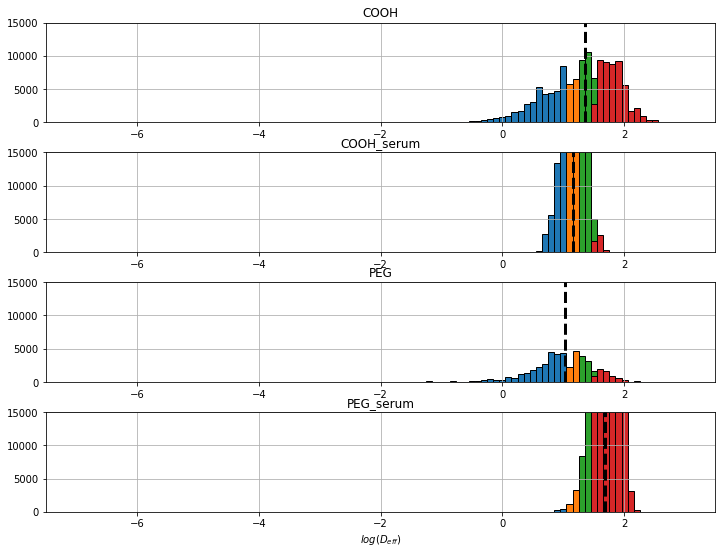

In [44]:
Dbins = [-10, 1.10, 1.262, 1.528, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_train[X_train['Type and Serum']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_train[(X_train['Type and Serum']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_train[X_train['Type and Serum']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

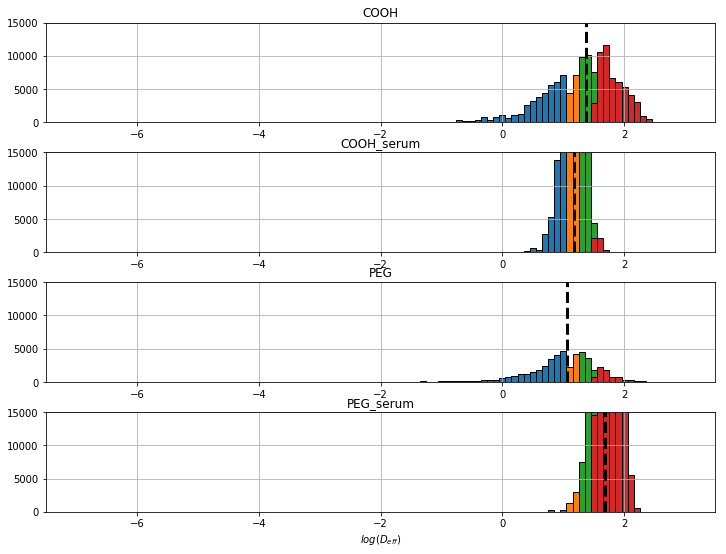

In [47]:
Dbins = [-10, 1.10, 1.262, 1.528, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_test[X_test['Type and Serum']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_test[(X_test['Type and Serum']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_test[X_test['Type and Serum']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

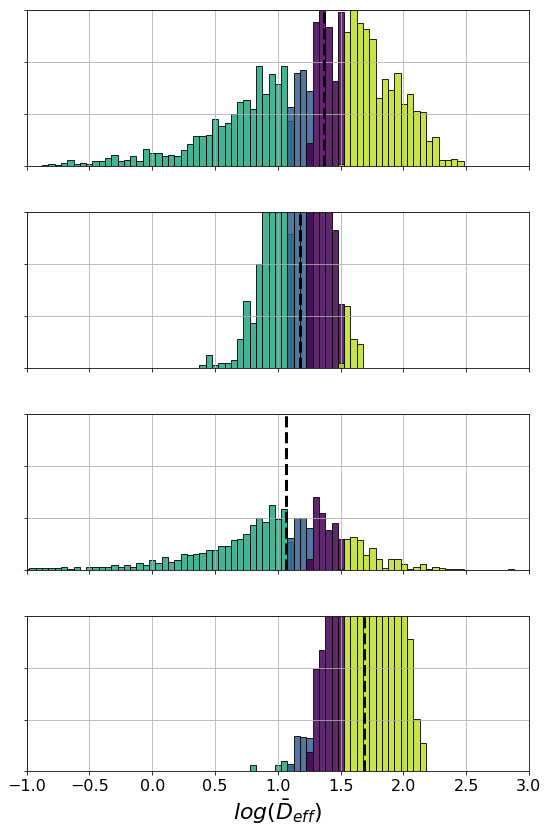

In [68]:
from matplotlib.pyplot import cm
Dbins = [-10, 1.10, 1.262, 1.528, 10]
bins = np.linspace(-10, 10, 400)
fig, axes = plt.subplots(nrows=4, figsize=(12, 14))
counter = 0
means = []
labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
for ax in axes:
    means.append(X_test[X_test['Type and Serum']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Type and Serum']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-1, 3])
        ax.set_ylim([0, 6000])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Type and Serum']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    #if counter == 0:
        #ax.legend(fontsize=17)
    if counter == 3:
        ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/corona_hist2.png', dpi=300, pad_inches=0.1)

In [ ]:
from matplotlib.pyplot import cm
Dbins = [-10, 1.10, 1.262, 1.528, 10]
bins = np.linspace(-10, 10, 400)
fig, axes = plt.subplots(nrows=4, figsize=(9, 14))
counter = 0
means = []
labels3 = ['PS-PEG in serum', 'PS-COOH', 'PS-COOH in serum', 'PS-PEG']
for ax in axes:
    means.append(X_test[X_test['Type and Serum']==types[counter]]['LogMeanDeff2'].median())
    color = iter(newmap)
    for i in range(4):
        c = next(color)
        X_test[(X_test['Type and Serum']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(9,3), label = labels3[3-i], color=c, alpha=0.85, edgecolor='k', ax=ax, )
        ax.set_xlim([-1, 3])
        ax.set_ylim([0, 6000])
        ax.tick_params(labelsize=16)
    ax.axvline(X_test[X_test['Type and Serum']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title('')
    #if counter == 0:
        #ax.legend(fontsize=17)
    ax.set_yticklabels([])
    if counter == 3:
        ax.set_xlabel(r'$log(\bar{D}_{eff})$', fontsize=22)
    if counter != 3:
        ax.set_xticklabels([])
    counter = counter + 1
fig.savefig('./pics/corona_hist2.png', dpi=300, pad_inches=0.1)

In [53]:
cm.viridis(np.linspace(0.9, 0.0, 4))[1:4, :]

array([[ 0.134692,  0.658636,  0.517649,  1.      ],
       [ 0.206756,  0.371758,  0.553117,  1.      ],
       [ 0.267004,  0.004874,  0.329415,  1.      ]])

In [61]:
newmap = np.zeros((4,4))
newmap[0:3, :] = cm.viridis(np.linspace(0.9, 0.0, 4))[1:4, :]
newmap[3, :] = cm.viridis(np.linspace(0.9, 0.0, 4))[0, :]
newmap

array([[ 0.134692,  0.658636,  0.517649,  1.      ],
       [ 0.206756,  0.371758,  0.553117,  1.      ],
       [ 0.267004,  0.004874,  0.329415,  1.      ],
       [ 0.741388,  0.873449,  0.149561,  1.      ]])

In [48]:
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=[-10, 1.10, 1.262, 1.528, 10], labels=types).astype(str))
y_true2 = X_train['Type and Serum'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

       COOH     0.3160    0.3289    0.3223    134717
 COOH_serum     0.7281    0.3572    0.4792    191947
        PEG     0.0611    0.1660    0.0894     52038
  PEG_serum     0.8247    0.8282    0.8264    351935
        nan     0.0000    0.0000    0.0000         0

avg / total     0.6511    0.5652    0.5898    730637



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [49]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=[-10, 1.10, 1.262, 1.528, 10], labels=types).astype(str))
y_true2 = X_test['Type and Serum'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

       COOH     0.3292    0.3242    0.3267    135518
 COOH_serum     0.7531    0.3743    0.5000    191654
        PEG     0.0665    0.1908    0.0986     51917
  PEG_serum     0.8201    0.8206    0.8203    352061
        nan     0.0000    0.0000    0.0000         0

avg / total     0.6580    0.5669    0.5936    731150



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_tot.shape[0]), 500000)))
fstats_sub = fstats_tot.loc[subset, :].reset_index(drop=True)

In [ ]:
fstats_tot['Type and Serum'].unique()

In [ ]:
for typ in fstats_tot['Type and Serum'].unique():
    fstats_type = fstats_tot[fstats_tot['Type and Serum']==typ].reset_index(drop=True)
    print(fstats_type.shape)

In [3]:
#with equal sample sizes for each particle type
import random
counter = 0
for typ in fstats_tot['Type and Serum'].unique():
    fstats_type = fstats_tot[fstats_tot['Type and Serum']==typ].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 50000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

(270235, 71)
(383602, 71)
(103955, 71)
(703996, 71)


In [4]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Type and Serum', 'Type', 'Serum', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
fstats_num = fstats_sub.drop(nonnum, axis=1)
fstats_raw = fstats_num.as_matrix()
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [5]:
ncomp = 14
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.1861403103848126
1 component: 0.29592702171768853
2 component: 0.3992889227570388
3 component: 0.48528937494437446
4 component: 0.5333483761626543
5 component: 0.577756820696703
6 component: 0.6170165822561211
7 component: 0.6554889093142278
8 component: 0.6890848397847109
9 component: 0.7151248878802285
10 component: 0.7391728899984508
11 component: 0.7630697703749598
12 component: 0.7830508753495513
13 component: 0.8020892372726037


In [6]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [7]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2', 'Mean alpha',
       'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object

In [8]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Mean Deff1,asymmetry3,Mean boundedness,Mean asymmetry2,Std asymmetry3,Std frames,D_fit,frames,MSD_ratio,Deff1,Std MSD_ratio,Std SN_Ratio,Std Quality,Std alpha
1,Mean fractal_dim,elongation,Mean trappedness,Mean asymmetry1,Mean frames,Mean kurtosis,alpha,trappedness,alpha,kurtosis,Mean MSD_ratio,Std alpha,Std efficiency,Mean alpha
2,Mean Quality,asymmetry2,Std fractal_dim,Mean asymmetry3,Std asymmetry2,Mean frames,Mean alpha,boundedness,asymmetry1,SN_Ratio,Std trappedness,Mean alpha,Std MSD_ratio,Std SN_Ratio
3,Std Deff1,asymmetry1,Mean kurtosis,Mean elongation,Std asymmetry1,Std kurtosis,Std SN_Ratio,straightness,asymmetry2,D_fit,Std boundedness,Std efficiency,Std SN_Ratio,Std straightness
4,Mean_Intensity,AR,Std kurtosis,Std asymmetry1,Std elongation,Mean efficiency,straightness,Quality,asymmetry3,alpha,Std frames,Deff1,Mean alpha,Std trappedness


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [7]:
import numpy as np
featofvar = 'Type and Serum'
#ncomp = 14
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='COOH'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='COOH_serum'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='PEG'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final[featofvar]=='PEG_serum'].values[:, -ncomp:], axis=0)

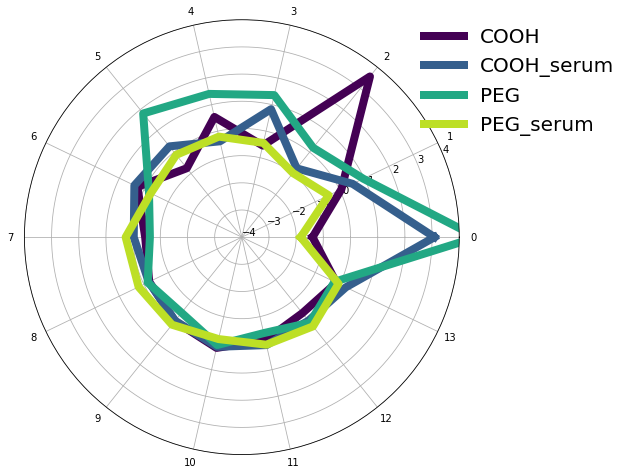

In [10]:
labels = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 4, 9))

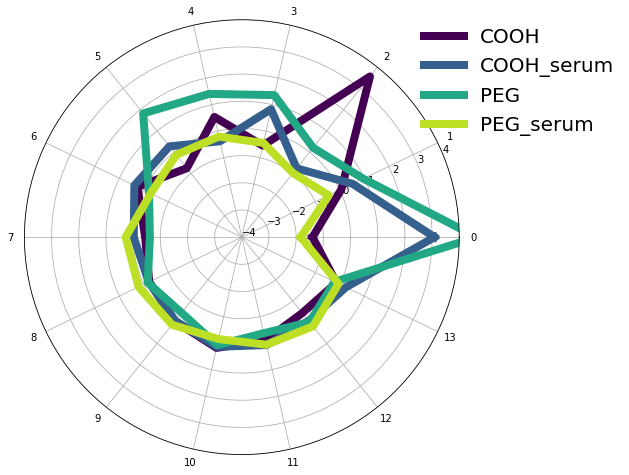

In [8]:
labels = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']
pca.plot_pca(dicti, savefig=True, labels=labels, rticks=np.linspace(-4, 4, 9))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

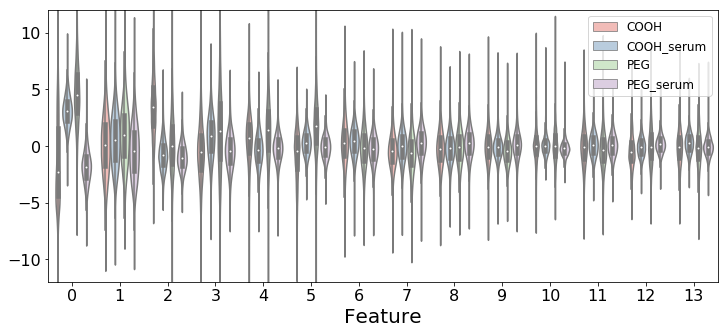

In [11]:
#labels=['10K', '5K', '1K', 'COOH']
feats = pca.feature_violin(pcadataset.final, label=featofvar, lvals=labels, fsubset=ncomp, yrange=[-12, 12])

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 4)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(prop={'size': 18})
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

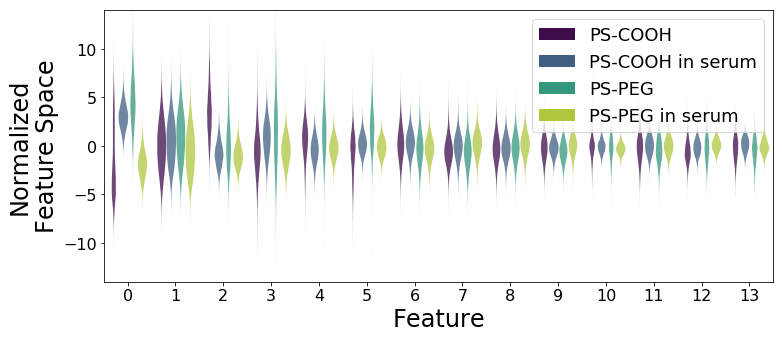

In [27]:
labels2 = ['PS-COOH', 'PS-COOH in serum', 'PS-PEG', 'PS-PEG in serum']
feats = feature_violin(pcadataset.final, label='Type and Serum', lvals=labels, labels=labels2, fsubset=14, yrange=[-14, 14],
                       legendfontsize=21, labelsize=24, fname='./pics/corona_pcadist.png')

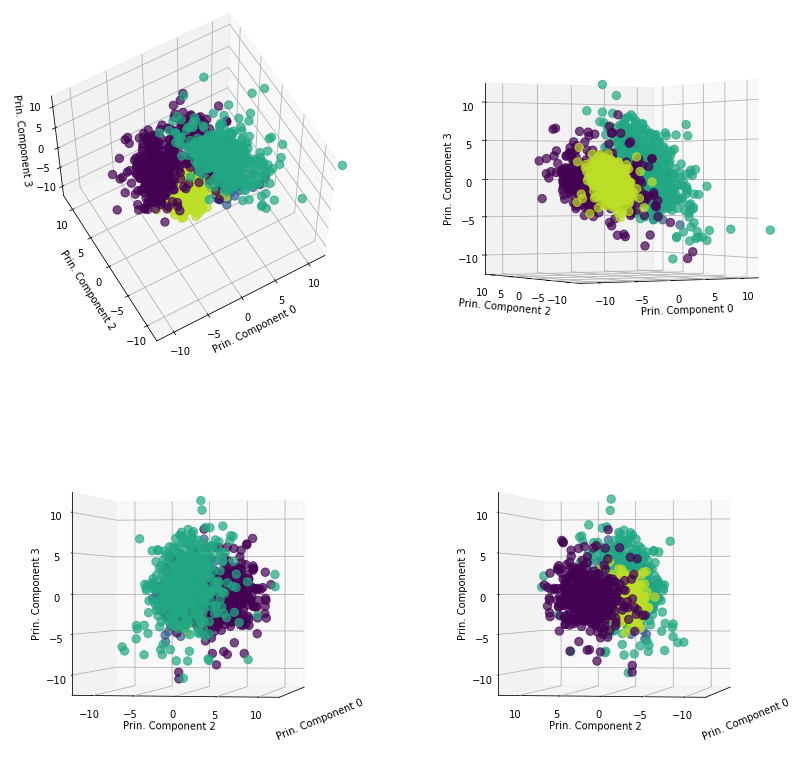

In [12]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label=featofvar, lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 2, 3])

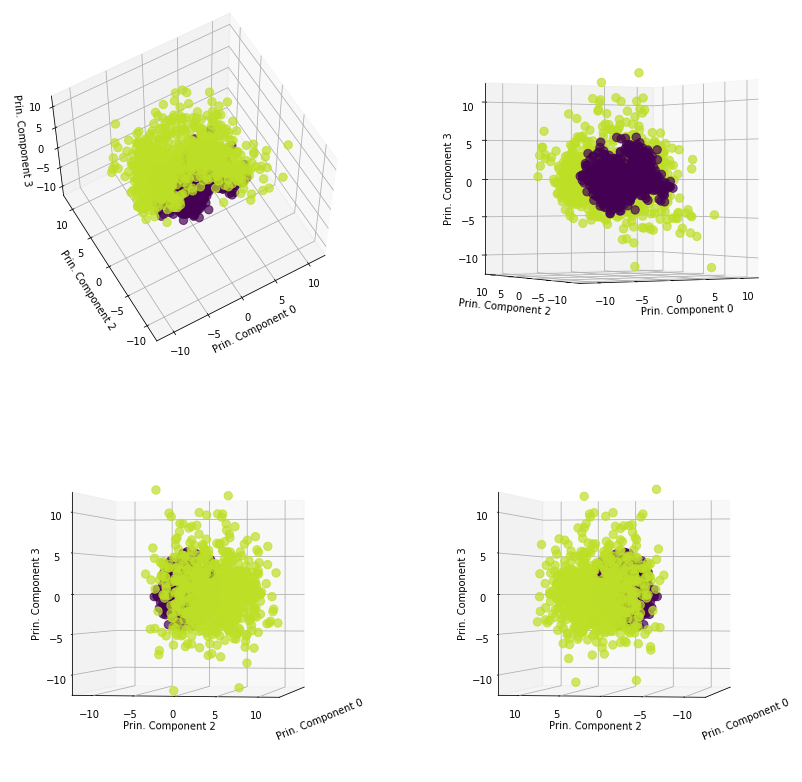

In [13]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Serum', lvals=['serum', 'no serum'], randcount=800, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 2, 3])

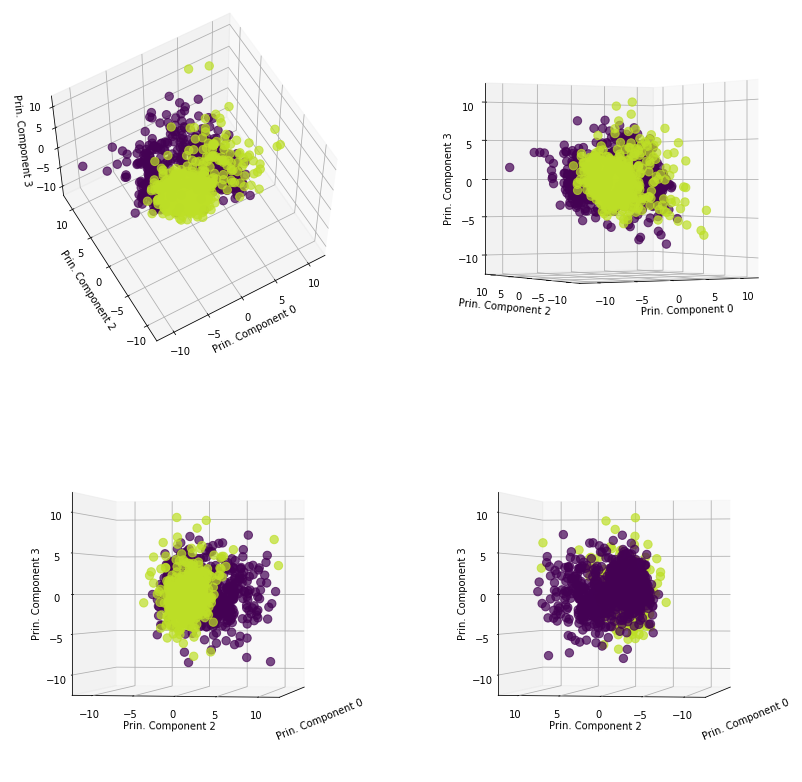

In [14]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Type', lvals=['COOH', 'PEG'], randcount=800, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], features=[0, 2, 3])

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [16]:
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

Iteration 1, loss = 0.07079959
Validation score: 0.984984
Iteration 2, loss = 0.04485584
Validation score: 0.987401
Iteration 3, loss = 0.03982577
Validation score: 0.988792
Iteration 4, loss = 0.03660892
Validation score: 0.989750
Iteration 5, loss = 0.03398192
Validation score: 0.990161
Iteration 6, loss = 0.03164677
Validation score: 0.990525
Iteration 7, loss = 0.02966943
Validation score: 0.992008
Iteration 8, loss = 0.02781275
Validation score: 0.992076
Iteration 9, loss = 0.02641468
Validation score: 0.993022
Iteration 10, loss = 0.02502592
Validation score: 0.993444
Iteration 11, loss = 0.02368114
Validation score: 0.992509
Iteration 12, loss = 0.02255488
Validation score: 0.994539
Iteration 13, loss = 0.02148405
Validation score: 0.995246
Iteration 14, loss = 0.02064957
Validation score: 0.994961
Iteration 15, loss = 0.01988653
Validation score: 0.995382
Iteration 16, loss = 0.01927127
Validation score: 0.995519
Iteration 17, loss = 0.01861541
Validation score: 0.994516
Iterat

In [18]:
print('Training Results')
y_true1, y_pred1 = y_train, clf.predict(X_train)
print(classification_report(y_true1, y_pred1, digits=4))

print('Test Results')
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred, digits=4))

Training Results
             precision    recall  f1-score   support

       COOH     0.9993    0.9983    0.9988    161846
 COOH_serum     0.9977    0.9990    0.9984    230296
        PEG     0.9963    0.9930    0.9947     62261
  PEG_serum     0.9996    0.9998    0.9997    422669

avg / total     0.9988    0.9988    0.9988    877072

Test Results

             precision    recall  f1-score   support

       COOH     0.9990    0.9976    0.9983    108389
 COOH_serum     0.9968    0.9985    0.9977    153306
        PEG     0.9940    0.9904    0.9922     41694
  PEG_serum     0.9995    0.9997    0.9996    281327

avg / total     0.9983    0.9983    0.9983    584716



Text(0,0.5,'Validation Scores')

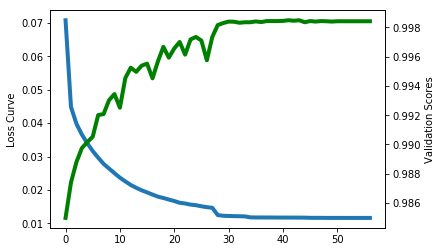

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')

In [10]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [11]:
featofvar = 'Type and Serum'
#ncomp = 16

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.07052912
Validation score: 0.986040
Iteration 2, loss = 0.03793598
Validation score: 0.990036
Iteration 3, loss = 0.03170943
Validation score: 0.991747
Iteration 4, loss = 0.02763970
Validation score: 0.992760
Iteration 5, loss = 0.02451784
Validation score: 0.993034
Iteration 6, loss = 0.02187941
Validation score: 0.994649
Iteration 7, loss = 0.01982421
Validation score: 0.994826
Iteration 8, loss = 0.01800717
Validation score: 0.995826
Iteration 9, loss = 0.01653273
Validation score: 0.995908
Iteration 10, loss = 0.01529847
Validation score: 0.996702
Iteration 11, loss = 0.01426516
Validation score: 0.996784
Iteration 12, loss = 0.01344705
Validation score: 0.996688
Iteration 13, loss = 0.01272482
Validation score: 0.996086
Iteration 14, loss = 0.01216267
Validation score: 0.997550
Iteration 15, loss = 0.01162128
Validation score: 0.998070
Iteration 16, loss = 0.01114837
Validation score: 0.997947
Iteration 17, loss = 0.01085831
Validation score: 0.998043
Iterat

In [ ]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labels3 = ['COOH', 'PEG']
labels = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

for i in range(0, 3):
    KNNmod, X, y = pca.build_model(pcadataset.final, featofvar, labels, equal_sampling=True,
                                       tsize=2000, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 5, 3))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final[featofvar].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
#ncomp = 14
trainp = np.array([])
testp = np.array([])
labels3 = ['COOH', 'PEG']
labels = ['COOH', 'COOH_serum', 'PEG', 'PEG_serum']

for i in range(0, 5):
    KNNmod, X, y = pca.build_model(pcadataset.final, featofvar, labels, equal_sampling=True,
                                       tsize=2000, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 5, 3))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final[featofvar].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
ypred = pd.Series(KNNmod.predict(X2)).str.split('_', expand=True)

In [ ]:
ya = np.copy(yact[0].values)
ya[ya == 'COOH'] = 1
ya[ya != 1] = 0

yp = np.copy(ypred[0].values)
yp[yp == 'COOH'] = 1
yp[yp != 1] = 0

In [ ]:
from sklearn import metrics

def mod_roc_curve(y_true, y_score, pos_label):
    ya = np.copy(y_true)
    ya[ya == pos_label] = 1
    ya[ya != 1] = 0

    yp = np.copy(y_score)
    yp[yp == pos_label] = 1
    yp[yp != 1] = 0
    
    fpr, tpr, thresholds = metrics.roc_curve(ya, yp, drop_intermediate=False)
    return fpr, tpr, thresholds

In [ ]:
fpr, tpr, thresholds = mod_roc_curve(yact[1].values, ypred[1].values, pos_label=None)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
yr1 = np.random.randint(0, 2, size=400)
yr2 = np.random.rand(400)
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 10
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 2.5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
noise = 1.5
size = 400
yr1 = np.random.randint(0, 2, size=size)
yr2 = yr1 + noise*np.random.rand(size) - 0.5*noise
fpr, tpr, thresholds = metrics.roc_curve(yr1, yr2)
plt.plot(fpr, tpr)

In [ ]:
KNNmod.score(X2, y2)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import metrics

In [ ]:
ynew = label_binarize(y, classes=labels)
y2new = label_binarize(y2, classes=labels)
n_classes = ynew.shape[1]

In [ ]:
ynew

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

In [ ]:
y_score = classifier.fit(X, ynew).decision_function(X2)

In [ ]:
y_scorep = pd.DataFrame(data=y_score.transpose()).idxmax()
y2newp = pd.DataFrame(data=y2new.transpose()).idxmax()

In [ ]:
ycorrect = y_scorep == y2newp

In [ ]:
ycorrect.mean()

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y2new[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y2new.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
tclass = 0
plt.figure()
lw = 4
plt.plot(fpr[tclass], tpr[tclass], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[tclass])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
classifier.score(X2, y2new)

In [ ]:
roc_auc[0]*roc_auc[1]*roc_auc[2]*roc_auc[3]

In [ ]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'slategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 0.4])
plt.ylim([0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

I found a standard way of implementing ROC curves with non-binary data called the one versus all method. It essentially breaks a n-class system into n-1 binary systems, and you make an n-1 roc curves for each case. I can't use MLP methods this way, but it looks like I can get high predictive power as-is? Kind of? I can get 

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y, y_score)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [ ]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
y

In [ ]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [ ]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])